In [1]:
import numpy as np
import pandas as pd
import json 
import imblearn
import nltk

In [2]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
s = "We are putting in efforts to enhance our understanding of \
Lemmatization"
token_list = s.split()
print("The tokens are: ", token_list)
lemmatized_output = ' '.join([lemmatizer.lemmatize(token) for token \
in token_list])
print("The lemmatized output is: ", lemmatized_output)

[nltk_data] Downloading package wordnet to /home/pedro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The tokens are:  ['We', 'are', 'putting', 'in', 'efforts', 'to', 'enhance', 'our', 'understanding', 'of', 'Lemmatization']
The lemmatized output is:  We are putting in effort to enhance our understanding of Lemmatization


In [3]:
from nltk.tokenize import TweetTokenizer
s = "@amankedia I'm going to buy a Rolexxxxxxxx watch!!! :-D #happiness #rolex <3"
tokenizer = TweetTokenizer()
tokenizer.tokenize(s)

['@amankedia',
 "I'm",
 'going',
 'to',
 'buy',
 'a',
 'Rolexxxxxxxx',
 'watch',
 '!',
 '!',
 '!',
 ':-D',
 '#happiness',
 '#rolex',
 '<3']

In [4]:
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(token_list)
pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pedro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('We', 'PRP'),
 ('are', 'VBP'),
 ('putting', 'VBG'),
 ('in', 'IN'),
 ('efforts', 'NNS'),
 ('to', 'TO'),
 ('enhance', 'VB'),
 ('our', 'PRP$'),
 ('understanding', 'NN'),
 ('of', 'IN'),
 ('Lemmatization', 'NN')]

In [5]:
from nltk.corpus import wordnet
##This is a common method which is widely used across the NLP community of practitioners and readers

def get_part_of_speech_tags(token):
    """Maps POS tags to first character lemmatize() accepts.
    We are focusing on Verbs, Nouns, Adjectives and Adverbs here."""

    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

In [6]:
lemmatized_output_with_POS_information = [lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in token_list]
print(' '.join(lemmatized_output_with_POS_information))

We be put in effort to enhance our understand of Lemmatization


In [7]:
[get_part_of_speech_tags(token) for token in token_list]

['n', 'v', 'v', 'n', 'n', 'n', 'n', 'n', 'v', 'n', 'n']

In [8]:
full_data = pd.read_json('data_and_meta.json')
print(full_data.info())
full_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232748 entries, 0 to 284530
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   index           232748 non-null  int64 
 1   reviewerID      232748 non-null  object
 2   asin            232748 non-null  object
 3   reviewerName    230910 non-null  object
 4   helpful         232748 non-null  object
 5   reviewText      232748 non-null  object
 6   overall         232748 non-null  int64 
 7   summary         232748 non-null  object
 8   unixReviewTime  232748 non-null  int64 
 9   reviewTime      232748 non-null  object
 10  features        232748 non-null  object
 11  amazonCategory  232748 non-null  object
 12  class           19918 non-null   object
 13  title           106284 non-null  object
 14  description     232748 non-null  object
 15  feature         232748 non-null  object
dtypes: int64(3), object(13)
memory usage: 30.2+ MB
None


,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,features,amazonCategory,class,title,description,feature
0,0,A1JUPR7LPMYG1X,B00009V2QX,"Chef Kim ""My Review""","[0, 0]",Its time for me to purchase another box. great...,4,Great,1356739200,"12 29, 2012","[-0.0987924889, 0.24677984890000002, 0.3721822...",health,None,None,,
1,1,A6YT8ATZ4SEKT,B00009V2QX,C. Moran,"[0, 0]","Recieved OLD black and silver procell package,...",3,recieved OLD STOCK,1401840000,"06 4, 2014","[-0.07366212, 0.345128, 0.30181372, -0.4765604...",health,None,None,,
2,2,A0678500JUN3N7KUG4PS,B000056OWW,GigiS,"[0, 0]",The best cold sore remover product I've ever u...,5,Great product.,1403049600,"06 18, 2014","[-0.2395376471, 0.2173122941, 0.3914945765, -0...",health,None,None,,
3,3,A4DRGD09QEE9I,B00009V2QX,"C. R. Dyer ""home maker""","[0, 0]",If you've ever noticed your flashlights are di...,5,Batteries,1357516800,"01 7, 2013","[-0.2284705294, 0.2700145882, 0.45578470590000...",health,None,None,,
4,4,ABT4HGNR22RWO,B00009V2QX,Daniel L. Kellett Sr.,"[0, 0]",Received fast and as described. I have only u...,5,Big bang for your buck...,1320105600,"11 1, 2011","[-0.1749965652, 0.2965097391, 0.2584427783, -0...",health,None,None,,


In [9]:
relevantColumns= [ 'class', 'amazonCategory','reviewText']
dataTextAnalysis = full_data[relevantColumns].dropna()

In [10]:
dataTextAnalysis.head()

,class,amazonCategory,reviewText
184362,Q1,office,I use these clips for everything. There a good...
184366,Q1,office,These boxes empty automatically; I have no ide...
184369,Q1,office,"This product may be fine enough, but the stora..."
184371,Q1,office,When you hit that 2:15 in the afternoon nappy ...
184382,Q1,office,"If the size is very important for you, check t..."


In [11]:
dataTextAnalysis['reviewText'].values[1]

"These boxes empty automatically; I have no idea where they get to. Occasionally I'll notice one under a screw on a cabinet door where 'food storage' lists or whatever is clipped. And there must be dozens of them clipped, two each, to a half inch of documents that no longer require a binder but are still used occasionally. But we've been buying these for 50 years... where have they gone? One clever use is as a handle for 'little things''; you clip them on, then slide the chrome pieces off the spring steel portions and just use what is left. We've got an ancient chest in the barn with one of these clipped onto each of the tiny drawer pulls so they're easier to grip."

In [12]:
tokenizer = TweetTokenizer()
token_list = tokenizer.tokenize(dataTextAnalysis['reviewText'].values[1])

In [13]:
def string_to_lexical(string):
    """ Returns a DataFrame wht the number of each lexical classes in the given string """
    
    tokenizer = TweetTokenizer()
    token_list = tokenizer.tokenize(string)
    df = pd.DataFrame([get_part_of_speech_tags(token) for token in token_list]).groupby(0).size()
    return df

In [14]:
df = pd.DataFrame()
def tag_string(s):
    tokenizer = TweetTokenizer()
    token_list = nltk.pos_tag(tokenizer.tokenize(s))
    df = pd.DataFrame(list(zip(*token_list))[1]).groupby(0).size()
    return df

In [15]:
lexicalsTAG = dataTextAnalysis['reviewText'].apply(string_to_lexical)
lexicalsTAG.head()

,a,n,r,v
184362,6.0,28.0,6.0,3.0
184366,4.0,118.0,8.0,12.0
184369,3.0,97.0,9.0,13.0
184371,3.0,51.0,7.0,9.0
184382,17.0,95.0,10.0,17.0
...,...,...,...,...
273497,41.0,695.0,51.0,87.0
273499,8.0,78.0,7.0,12.0
273501,5.0,147.0,12.0,21.0
273503,21.0,474.0,43.0,71.0


In [22]:
lexicalsTAG.columns= ['ADJ','NOUN','VERB','ADV']

In [16]:
lexicals = dataTextAnalysis['reviewText'].apply(tag_string)
lexicals.head()

,.,CC,DT,EX,IN,JJ,MD,NN,NNP,NNS,...,RBS,FW,UH,PDT,``,NNPS,#,SYM,WP$,LS
184362,5.0,2.0,4.0,1.0,2.0,5.0,1.0,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184366,6.0,6.0,17.0,1.0,14.0,4.0,1.0,17.0,2.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184369,7.0,2.0,16.0,1.0,12.0,8.0,4.0,21.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184371,3.0,3.0,8.0,NaN,7.0,4.0,2.0,11.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184382,4.0,3.0,15.0,NaN,12.0,18.0,2.0,20.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273497,33.0,32.0,77.0,5.0,89.0,58.0,14.0,114.0,23.0,41.0,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
273499,1.0,7.0,9.0,NaN,4.0,10.0,NaN,11.0,12.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273501,2.0,1.0,18.0,NaN,18.0,20.0,2.0,39.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273503,33.0,25.0,56.0,4.0,64.0,28.0,11.0,79.0,17.0,25.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
table2 = dataTextAnalysis.join(lexicalsTAG).groupby('amazonCategory').mean().T
table2

amazonCategory,automotive,electronics,games,office
ADJ,4.748053,7.2,11.021375,3.592593
NOUN,68.318186,66.6,160.586849,41.949153
VERB,6.023605,6.0,13.882512,4.272727
ADV,9.688513,9.4,21.665442,6.050847


<AxesSubplot:title={'center':'Mean by parts of speech for each category'}>

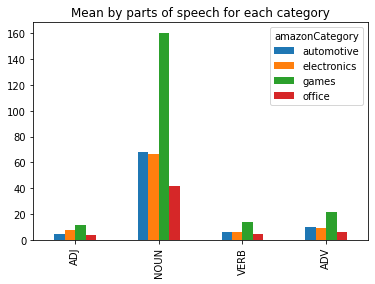

In [31]:
table2.plot(kind='bar', title='Mean by POS for each category')

<AxesSubplot:title={'center':'Median by POS for each category'}>

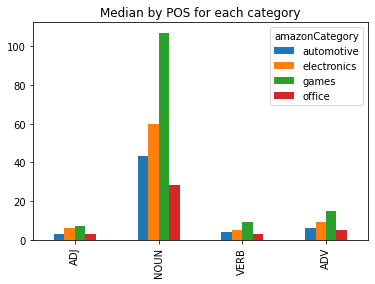

In [39]:
dataTextAnalysis.join(lexicalsTAG).groupby('amazonCategory').median().T.plot(kind='bar', title='Median by POS for each category')

In [62]:
word_sum = dataTextAnalysis.join(lexicalsTAG).groupby('amazonCategory').sum()
word_sum['sum'] = word_sum.T.sum()
word_sum

,ADJ,NOUN,VERB,ADV,sum
amazonCategory,,,,,
automotive,43288.0,681064.0,56140.0,95054.0,875546.0
electronics,36.0,333.0,30.0,47.0,446.0
games,104670.0,1587401.0,133286.0,212213.0,2037570.0
office,194.0,2475.0,235.0,357.0,3261.0


<AxesSubplot:>

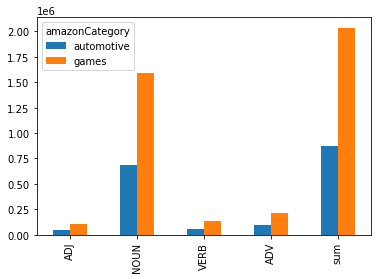

In [69]:
col = ['automotive','games']
word_sum.T[col].plot(kind='bar')

<AxesSubplot:>

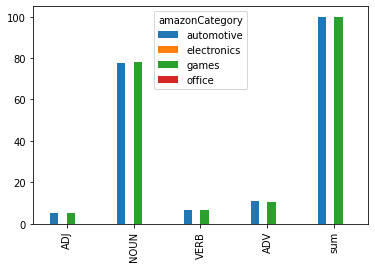

In [73]:
(word_sum.T[col]/ word_sum['sum']*100).plot(kind='bar')

In [18]:
pd.options.display.max_rows = 999
table = dataTextAnalysis.join(lexicals).groupby('amazonCategory').describe().T
table

amazonCategory   automotive  electronics        games     office
.    count      9651.000000     5.000000  9616.000000  58.000000
     mean          4.817946     4.600000     9.961626   3.568966
     std           4.697691     1.140175     9.320496   2.663015
     min           1.000000     3.000000     1.000000   1.000000
     25%           2.000000     4.000000     4.000000   2.000000
     50%           3.000000     5.000000     7.000000   3.000000
     75%           6.000000     5.000000    13.000000   4.000000
     max          93.000000     6.000000    83.000000  20.000000
CC   count      8784.000000     5.000000  9263.000000  47.000000
     mean          3.603370     3.000000     8.136241   2.042553
     std           3.873706     1.000000     8.017513   1.654473
     min           1.000000     2.000000     1.000000   1.000000
     25%           1.000000     2.000000     3.000000   1.000000
     50%           2.000000     3.000000     6.000000   2.000000
     75%           4.000000     4.000000    11.000000   2.000000
     max          65.000000     4.000000    67.000000  10.000000
DT   count      9790.000000     5.000000  9803.000000  58.000000
     mean          8.941369    10.800000    20.951341   5.172414
     std          10.507854     4.086563    21.069704   4.750394
     min           1.000000     5.000000     1.000000   1.000000
     25%           3.000000    10.000000     7.000000   2.250000
     50%           6.000000    10.000000    14.000000   4.000000
     75%          10.000000    13.000000    27.000000   6.000000
     max         190.000000    16.000000   160.000000  24.000000
EX   count       772.000000     0.000000  3029.000000   7.000000
     mean          1.222798          NaN     1.703202   1.142857
     std           0.597963          NaN     1.200256   0.377964
     min           1.000000          NaN     1.000000   1.000000
     25%           1.000000          NaN     1.000000   1.000000
     50%           1.000000          NaN     1.000000   1.000000
     75%           1.000000          NaN     2.000000   1.000000
     max           8.000000          NaN    12.000000   2.000000
IN   count      9737.000000     5.000000  9737.000000  57.000000
     mean          8.460820     6.200000    19.513300   5.438596
     std          10.343799     5.215362    20.955264   4.342553
     min           1.000000     1.000000     1.000000   1.000000
     25%           3.000000     1.000000     5.000000   2.000000
     50%           5.000000     7.000000    12.000000   4.000000
     75%          10.000000     9.000000    25.000000   7.000000
     max         185.000000    13.000000   140.000000  20.000000
JJ   count      9544.000000     5.000000  9652.000000  57.000000
     mean          6.406119     9.600000    15.050974   4.491228
     std           7.494424     1.673320    15.439565   4.158137
     min           1.000000     8.000000     1.000000   1.000000
     25%           2.000000     8.000000     5.000000   2.000000
     50%           4.000000    10.000000    10.000000   4.000000
     75%           7.000000    10.000000    20.000000   5.000000
     max         151.000000    12.000000   123.000000  23.000000
MD   count      5054.000000     2.000000  6916.000000  33.000000
     mean          2.021765     1.000000     3.259109   1.454545
     std           2.009851     0.000000     3.023640   0.753778
     min           1.000000     1.000000     1.000000   1.000000
     25%           1.000000     1.000000     1.000000   1.000000
     50%           1.000000     1.000000     2.000000   1.000000
     75%           2.000000     1.000000     4.000000   2.000000
     max          42.000000     1.000000    28.000000   4.000000
NN   count      9886.000000     5.000000  9806.000000  58.000000
     mean         13.119563    12.400000    26.473078   6.965517
     std          16.024130     5.176872    27.297646   6.461670
     min           1.000000     6.000000     1.000000   1.000000
     25%           5.000000    10.0

.: sentence terminator
    . ! ?
None
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
None
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
None
EX: existential there
    there
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
None
MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would
None
NN: noun, common, singular or mass
    common-carri

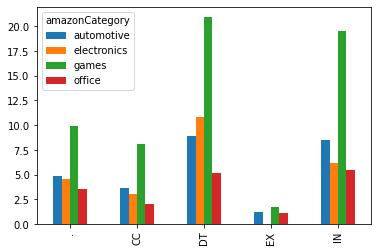

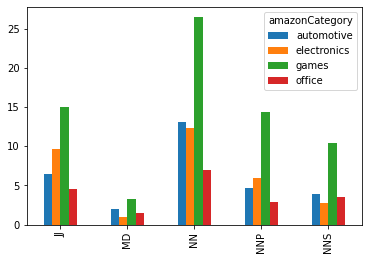

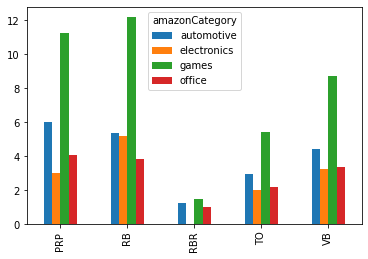

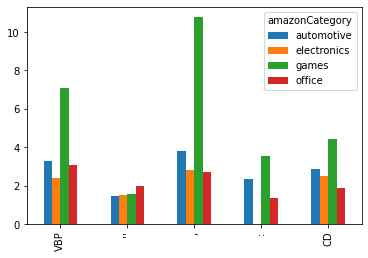

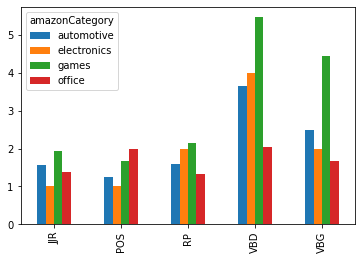

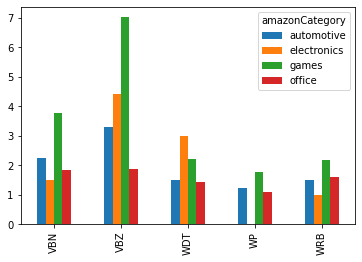

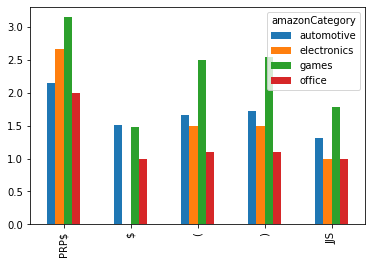

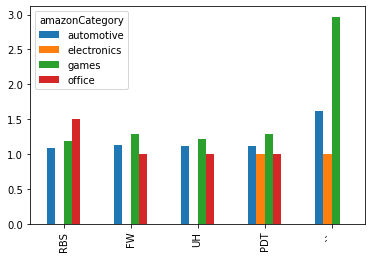

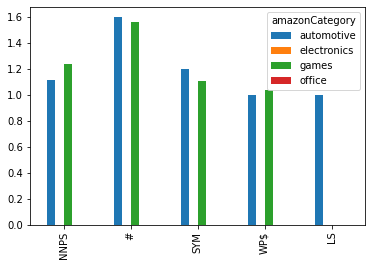

In [25]:
import matplotlib as plt
for i in range(5,50,5):
    x = dataTextAnalysis.join(lexicals).groupby('amazonCategory').mean().T[i-5:i]
    x.plot(kind='bar')
    for index in x.index:
        print(nltk.help.upenn_tagset(index))

In [26]:
x = dataTextAnalysis.join(lexicals).groupby('amazonCategory').sum().T 
x = x / x.sum(axis=0) *100
x

amazonCategory,automotive,electronics,games,office
.,5.310743,5.156951,4.701237,6.347746
CC,3.615116,3.363229,3.698818,2.943882
DT,9.997876,12.107623,10.079948,9.199632
EX,0.107818,0.000000,0.253194,0.245324
IN,9.409329,6.950673,9.324882,9.506286
JJ,6.983071,10.762332,7.129669,7.850353
MD,1.167043,0.448430,1.106220,1.471941
NN,14.813613,13.901345,12.740421,12.388838
NNP,3.894484,6.726457,6.165531,2.453235
NNS,3.640129,3.139013,4.652797,5.611776


In [74]:
y = dataTextAnalysis.join(lexicalsTAG).groupby('amazonCategory').sum()
y = y.T/dataTextAnalysis.join(lexicalsTAG).groupby('amazonCategory').sum().T.sum() *100
y

amazonCategory,automotive,electronics,games,office
ADJ,4.944115,8.071749,5.137001,5.949095
NOUN,77.787346,74.663677,77.906575,75.896964
VERB,6.411999,6.726457,6.541419,7.206378
ADV,10.856540,10.538117,10.415004,10.947562


<AxesSubplot:title={'center':'Words frequency per class by category'}>

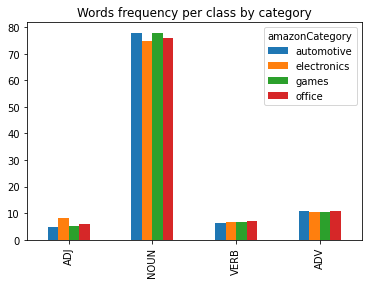

In [77]:
y.plot(kind='bar',title='Words frequency per class by category')

In [82]:
from textblob import TextBlob
TextBlob("I love pizza").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [94]:
dataTextAnalysis.iloc[1]

class                                                            Q1
amazonCategory                                               office
reviewText        These boxes empty automatically; I have no ide...
Name: 184366, dtype: object

In [89]:
TextBlob(dataTextAnalysis.reviewText.values[1]).sentiment

Sentiment(polarity=-0.0359375, subjectivity=0.34375)

In [96]:
dataTextAnalysis.iloc[1000]

class                                                            Q2
amazonCategory                                           automotive
reviewText        Amazon is the best place to buy these. They ar...
Name: 225798, dtype: object

In [95]:
TextBlob(dataTextAnalysis.reviewText.values[1000]).sentiment

Sentiment(polarity=0.2399267399267399, subjectivity=0.6294566544566543)

In [99]:
dataTextAnalysis.loc[273497]

class                                                            Q4
amazonCategory                                                games
reviewText        This game is incredibly simple yet dangerously...
Name: 273497, dtype: object

In [152]:
result = pd.DataFrame(columns=['polarity','subjectivity'])
result['sentiment'] = dataTextAnalysis['reviewText'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [168]:
result = result['sentiment'].apply(pd.Series)
result.columns=['polarity','subjectivity']

In [171]:
result = result.join(dataTextAnalysis)

In [175]:
col = ['polarity',	'subjectivity',	'class']
result[col].groupby('class').describe()

polarity                                                               \
         count      mean       std   min       25%       50%       75%  max   
class                                                                         
Q1        59.0  0.270291  0.218754 -0.20  0.131845  0.255556  0.418819  1.0   
Q2      9974.0  0.223380  0.210654 -0.75  0.091383  0.200000  0.341667  1.0   
Q4      9885.0  0.108914  0.168570 -1.00  0.016327  0.101432  0.192930  1.0   

      subjectivity                                                              
             count      mean       std  min       25%       50%       75%  max  
class                                                                           
Q1            59.0  0.508733  0.157199  0.0  0.440833  0.508333  0.600000  1.0  
Q2          9974.0  0.517252  0.168879  0.0  0.425000  0.516667  0.615000  1.0  
Q4          9885.0  0.511824  0.099106  0.0  0.459987  0.510379  0.565278  1.0

<AxesSubplot:title={'center':'Distribution by sentiment polarity and subjectiviness for Q2'}, ylabel='Frequency'>

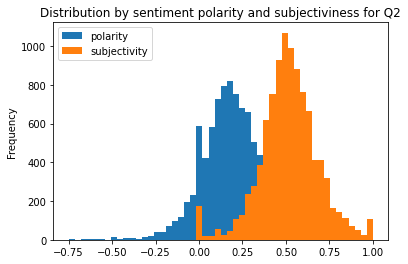

In [182]:
result[col].loc[result['class']=='Q2'].plot.hist( bins=50, title='Distribution by sentiment polarity and subjectiviness for Q2')

<AxesSubplot:title={'center':'Distribution by sentiment polarity and subjectiviness for Q4'}, ylabel='Frequency'>

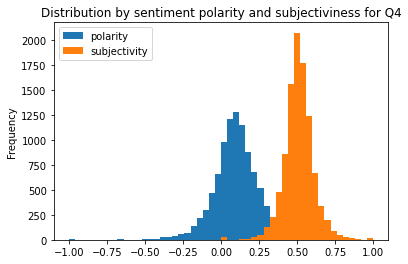

In [183]:
result[col].loc[result['class']=='Q4'].plot.hist( bins=50, title='Distribution by sentiment polarity and subjectiviness for Q4')

<AxesSubplot:xlabel='class'>

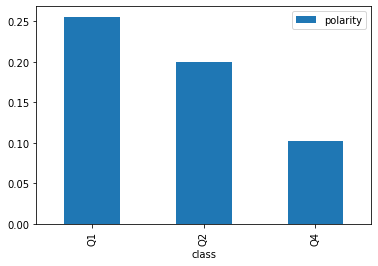

In [193]:
col=['polarity','class']
result[col].groupby('class').median().plot(kind='bar')

<AxesSubplot:title={'center':'polarity distribution for Q2'}, ylabel='Frequency'>

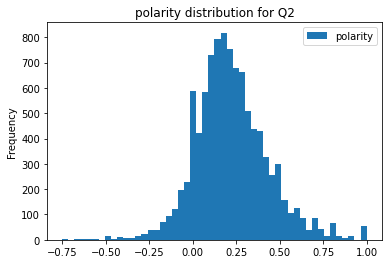

In [205]:
col=['polarity','class']
test = result.loc[(result['class']=='Q2')]
test[col].plot.hist(bins=50, title='polarity distribution for Q2')

<AxesSubplot:title={'center':'polarity distribution for Q4'}, ylabel='Frequency'>

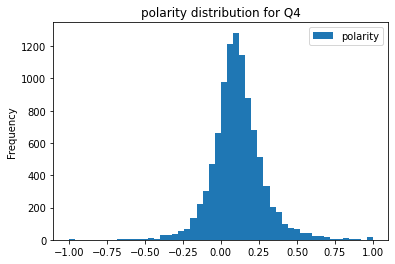

In [206]:
col=['polarity','class']
test = result.loc[(result['class']=='Q4')]
test[col].plot.hist(bins=50, title='polarity distribution for Q4')

<AxesSubplot:title={'center':'subjectivity distribution for Q2'}, ylabel='Frequency'>

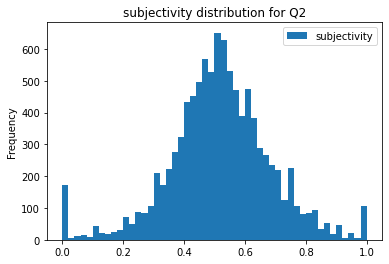

In [207]:
col=['subjectivity','class']
test = result.loc[(result['class']=='Q2')]
test[col].plot.hist(bins=50, title='subjectivity distribution for Q2')

<AxesSubplot:title={'center':'subjectivity distribution for Q4'}, ylabel='Frequency'>

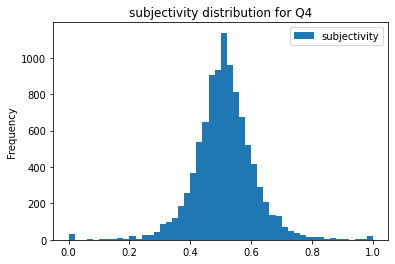

In [208]:
col=['subjectivity','class']
test = result.loc[(result['class']=='Q4')]
test[col].plot.hist(bins=50, title='subjectivity distribution for Q4')